# Data Preparation
The raw data collected from the Arquivo.pt API should be cleaned and prepared for the further data analysis and search system implementarion in posterior stages of the project. Therefore all the data, especially the textual one, should be normalized to fit better search criteria.

Firstly we import all of the relevant packages for the data cleanup.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

### Preliminary Data Analysis:
We start by examining the data collected to better grasp it's extent and content.

In [5]:
df = pd.read_json("../data/raw/ch.json")
df.shape

(3497, 5)

In [6]:
df.columns

Index(['date', 'link', 'contentLength', 'type', 'text'], dtype='object')

#### Data Preview:

In [7]:
df.head()

,date,link,contentLength,type,text
0,2019-03-27 00:46:12,https://arquivo.pt/wayback/20190327004612/http...,2510,text/html,Página Inicial | Partido Político CHEGA Skip t...
1,2019-03-27 00:42:44,https://arquivo.pt/wayback/20190327004244/http...,1911,text/html,A sua palavra conta! | Partido Político CHEGA ...
2,2019-03-27 00:42:39,https://arquivo.pt/wayback/20190327004239/http...,67,text/plain,User-agent: *\nDisallow: /wp-admin/\nAllow: /w...
3,2019-03-27 00:52:38,https://arquivo.pt/wayback/20190327005238/http...,0,text/html,
4,2019-03-27 00:48:41,https://arquivo.pt/wayback/20190327004841/http...,920,text/html,A Fundação – uma História que começa | Partido...


### Cleaning Unrecognized Characters in Data:

Our text field has multiple unrecognized characters and escape sequences that are unuseful so we removed them.

In [8]:
df["text"]=pd.Series(df['text'], dtype="string")

df["text"]=df["text"].str.replace("[\n\t\r]","",regex=True)
df["text"]=df["text"].str.replace(" +"," ",regex=True)

df

,date,link,contentLength,type,text
0,2019-03-27 00:46:12,https://arquivo.pt/wayback/20190327004612/http...,2510,text/html,Página Inicial | Partido Político CHEGA Skip t...
1,2019-03-27 00:42:44,https://arquivo.pt/wayback/20190327004244/http...,1911,text/html,A sua palavra conta! | Partido Político CHEGA ...
2,2019-03-27 00:42:39,https://arquivo.pt/wayback/20190327004239/http...,67,text/plain,User-agent: *Disallow: /wp-admin/Allow: /wp-ad...
3,2019-03-27 00:52:38,https://arquivo.pt/wayback/20190327005238/http...,0,text/html,
4,2019-03-27 00:48:41,https://arquivo.pt/wayback/20190327004841/http...,920,text/html,A Fundação – uma História que começa | Partido...
...,...,...,...,...,...
3492,2020-11-16 19:09:51,https://arquivo.pt/wayback/20201116190951/http...,67,text/plain,User-agent: *Disallow: /wp-admin/Allow: /wp-ad...
3493,2020-11-12 23:44:43,https://arquivo.pt/wayback/20201112234443/http...,67,text/plain,User-agent: *Disallow: /wp-admin/Allow: /wp-ad...
3494,2020-12-07 19:37:34,https://arquivo.pt/wayback/20201207193734/http...,67,text/plain,User-agent: *Disallow: /wp-admin/Allow: /wp-ad...
3495,2020-12-06 19:09:41,https://arquivo.pt/wayback/20201206190941/http...,67,text/plain,User-agent: *Disallow: /wp-admin/Allow: /wp-ad...


### Analysing Null Values:
Since our dataset is collected using the Arquivo.pt API, no null values are considered globally.

In [9]:
df.isnull().sum().sum()

0

#### Checking Empty Text Fields:

In [10]:
df[df["text"]==""]

,date,link,contentLength,type,text
3,2019-03-27 00:52:38,https://arquivo.pt/wayback/20190327005238/http...,0,text/html,
7,2019-03-27 00:51:14,https://arquivo.pt/wayback/20190327005114/http...,0,application/json,
8,2019-03-27 00:47:54,https://arquivo.pt/wayback/20190327004754/http...,0,application/vnd.ms-fontobject,
9,2019-03-27 00:46:24,https://arquivo.pt/wayback/20190327004624/http...,0,application/json,
10,2019-03-27 00:52:16,https://arquivo.pt/wayback/20190327005216/http...,0,application/json,
...,...,...,...,...,...
3471,2020-05-07 21:44:57,https://arquivo.pt/wayback/20200507214457/http...,0,application/json,
3472,2020-05-07 21:44:46,https://arquivo.pt/wayback/20200507214446/http...,0,application/json,
3473,2020-05-09 04:57:32,https://arquivo.pt/wayback/20200509045732/http...,0,application/json,
3474,2020-05-10 21:45:10,https://arquivo.pt/wayback/20200510214510/http...,0,application/json,


#### Replacing Empty Text With Null Values:

In [11]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df

,date,link,contentLength,type,text
0,2019-03-27 00:46:12,https://arquivo.pt/wayback/20190327004612/http...,2510,text/html,Página Inicial | Partido Político CHEGA Skip t...
1,2019-03-27 00:42:44,https://arquivo.pt/wayback/20190327004244/http...,1911,text/html,A sua palavra conta! | Partido Político CHEGA ...
2,2019-03-27 00:42:39,https://arquivo.pt/wayback/20190327004239/http...,67,text/plain,User-agent: *Disallow: /wp-admin/Allow: /wp-ad...
3,2019-03-27 00:52:38,https://arquivo.pt/wayback/20190327005238/http...,0,text/html,<NA>
4,2019-03-27 00:48:41,https://arquivo.pt/wayback/20190327004841/http...,920,text/html,A Fundação – uma História que começa | Partido...
...,...,...,...,...,...
3492,2020-11-16 19:09:51,https://arquivo.pt/wayback/20201116190951/http...,67,text/plain,User-agent: *Disallow: /wp-admin/Allow: /wp-ad...
3493,2020-11-12 23:44:43,https://arquivo.pt/wayback/20201112234443/http...,67,text/plain,User-agent: *Disallow: /wp-admin/Allow: /wp-ad...
3494,2020-12-07 19:37:34,https://arquivo.pt/wayback/20201207193734/http...,67,text/plain,User-agent: *Disallow: /wp-admin/Allow: /wp-ad...
3495,2020-12-06 19:09:41,https://arquivo.pt/wayback/20201206190941/http...,67,text/plain,User-agent: *Disallow: /wp-admin/Allow: /wp-ad...


#### Number of Missing Data:

In [12]:
total = df.isnull().sum()
percent = df.isnull().sum()/df.isnull().count()*100.0
missing_data = pd.concat([total, percent], axis=1, keys=['Number', 'Percent'])
missing_data

,Number,Percent
date,0,0.000000
link,0,0.000000
contentLength,0,0.000000
type,0,0.000000
text,2380,68.058336


#### Missing Text per Website Type:

In [13]:
total_values_per_type = df['type'].value_counts()
missing_values_per_type = df.loc[df['text'].isnull(), 'type'].value_counts()
percent = (missing_values_per_type / total_values_per_type) * 100
missing_values = pd.concat([missing_values_per_type, total_values_per_type, percent], axis=1, keys=['Missing Text', 'Total', 'Percent']).fillna(0)
missing_values

,Missing Text,Total,Percent
application/json,1933.0,1938,99.742002
text/html,378.0,1432,26.396648
application/vnd.ms-fontobject,68.0,68,100.000000
text/calendar,1.0,1,100.000000
text/plain,0.0,38,0.000000
application/pdf,0.0,20,0.000000


##### Plot:

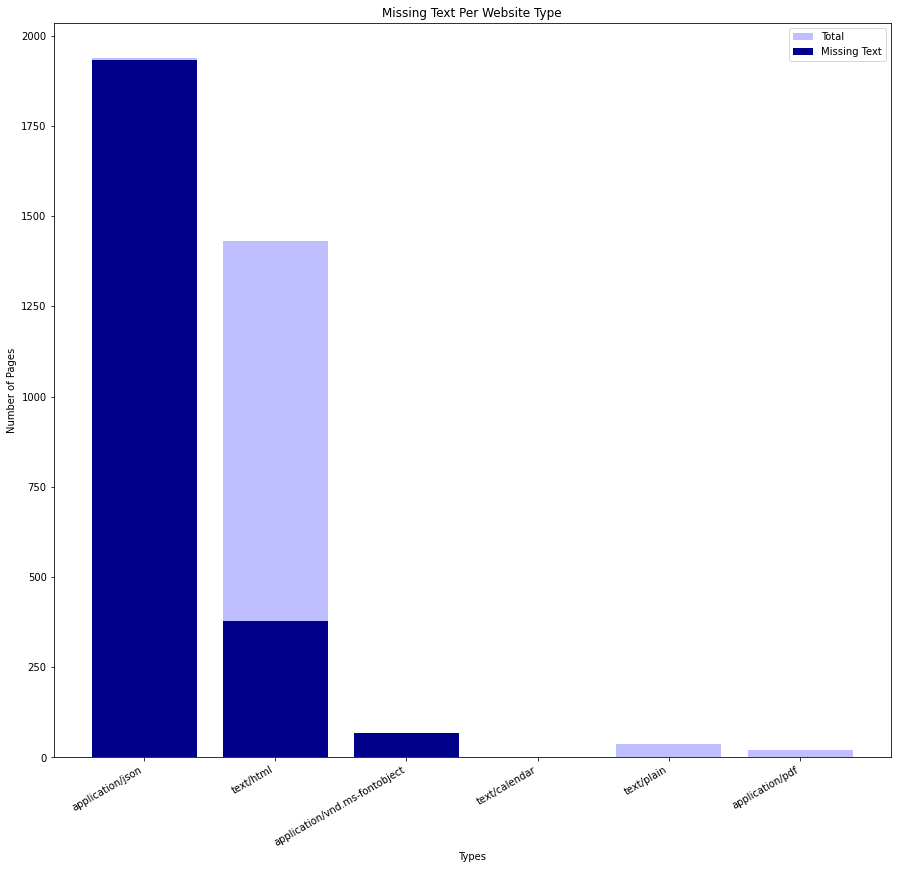

In [14]:
labels = missing_values.index.to_list()

fig, ax = plt.subplots(figsize=(15, 15))
for i in range(len(labels)):
    plt.bar(labels[i], missing_values['Total'][i], alpha=0.25, color= "blue")
    plt.bar(labels[i], missing_values['Missing Text'][i], color= "darkblue")

plt.title('Missing Text Per Website Type')
plt.legend(labels = ["Total", "Missing Text"])
plt.xlabel('Types')
plt.ylabel('Number of Pages')
fig.autofmt_xdate()

plt.show()

#### Removing Missing Text Lines:

In [15]:
df = df.dropna()
df

,date,link,contentLength,type,text
0,2019-03-27 00:46:12,https://arquivo.pt/wayback/20190327004612/http...,2510,text/html,Página Inicial | Partido Político CHEGA Skip t...
1,2019-03-27 00:42:44,https://arquivo.pt/wayback/20190327004244/http...,1911,text/html,A sua palavra conta! | Partido Político CHEGA ...
2,2019-03-27 00:42:39,https://arquivo.pt/wayback/20190327004239/http...,67,text/plain,User-agent: *Disallow: /wp-admin/Allow: /wp-ad...
4,2019-03-27 00:48:41,https://arquivo.pt/wayback/20190327004841/http...,920,text/html,A Fundação – uma História que começa | Partido...
5,2019-03-27 00:43:00,https://arquivo.pt/wayback/20190327004300/http...,2510,text/html,Página Inicial | Partido Político CHEGA Skip t...
...,...,...,...,...,...
3492,2020-11-16 19:09:51,https://arquivo.pt/wayback/20201116190951/http...,67,text/plain,User-agent: *Disallow: /wp-admin/Allow: /wp-ad...
3493,2020-11-12 23:44:43,https://arquivo.pt/wayback/20201112234443/http...,67,text/plain,User-agent: *Disallow: /wp-admin/Allow: /wp-ad...
3494,2020-12-07 19:37:34,https://arquivo.pt/wayback/20201207193734/http...,67,text/plain,User-agent: *Disallow: /wp-admin/Allow: /wp-ad...
3495,2020-12-06 19:09:41,https://arquivo.pt/wayback/20201206190941/http...,67,text/plain,User-agent: *Disallow: /wp-admin/Allow: /wp-ad...


### Remove Duplicates:
Some of the websites fetched are the same instances of the same webpage but colleted in a different timestamp, so it's unnecessary to have the same text content repeated in the dataset, given that the search system will only need to search the text.

In [16]:
df.drop_duplicates(subset=['text'],
                     keep='last', inplace=True)
df

/tmp/ipykernel_56497/3736081329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['text'],


,date,link,contentLength,type,text
1,2019-03-27 00:42:44,https://arquivo.pt/wayback/20190327004244/http...,1911,text/html,A sua palavra conta! | Partido Político CHEGA ...
5,2019-03-27 00:43:00,https://arquivo.pt/wayback/20190327004300/http...,2510,text/html,Página Inicial | Partido Político CHEGA Skip t...
32,2019-04-03 06:23:35,https://arquivo.pt/wayback/20190403062335/http...,1817,text/html,A sua palavra conta! | Partido Político CHEGA ...
33,2019-04-13 00:03:29,https://arquivo.pt/wayback/20190413000329/http...,1533,text/html,Partidos de direita coligam-se com André Ventu...
36,2019-04-14 13:32:20,https://arquivo.pt/wayback/20190414133220/http...,2480,text/html,Página Inicial | Partido Político CHEGA Skip t...
...,...,...,...,...,...
3322,2020-05-11 21:46:13,https://arquivo.pt/wayback/20200511214613/http...,4383,text/html,Home | CHEGA! Saltar para conteúdo Menu O Pres...
3324,2020-05-10 21:38:40,https://arquivo.pt/wayback/20200510213840/http...,4409,text/html,Home | CHEGA! Saltar para conteúdo Menu O Pres...
3327,2020-05-05 21:40:18,https://arquivo.pt/wayback/20200505214018/http...,2957,text/html,"""A contestação à Joacine não tem nada a ver co..."
3491,2020-11-20 23:25:34,https://arquivo.pt/wayback/20201120232534/http...,17888,application/pdf,70MEDIDASPARAREERGUERPORTUGALPARTIDO POLÍTICO ...


## Save Prepared Data:

In [31]:
df.to_json(r'data/ps_clean.json', orient='records')